In [7]:
import uproot
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from scipy.fft import fft, fftfreq
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import os
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import sys
from tqdm import tqdm

In [8]:
#text_file_nue.read()
with open('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/output_nue.log') as file:
    lines_nue = [line_nue.rstrip() for line_nue in file]
with open('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/output_new_nu.log') as file:
    lines_nu = [line_nu.rstrip() for line_nu in file]
#print(lines_nu[0])
with open('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/output_data.log') as file:
    lines_data = [line_data.rstrip() for line_data in file]
print(lines_nue[1])

SELECTED,1,7,0,0,2.000000,0.000000,4.000000,4.000000,3.000000,720.772109,489.404557,77.052063,74.840437,1,1,4,4,438.148244,885.889962,366.347168,262.575958,334.968109,336.862305,0.532757,0.565646,0.739849,0.730488,1.570057,1.512650,inf,706.457469,-nan,-nan,3.056508,2.904112,0.883996,0.995447,0,0,1,


In [9]:
df_data= {'Type': [], 'Run': [], 'Evt': [], 'Subrun':[],'Image_id':[],'Interaction_id':[], 'leading_electron_ke_reco':[],
     'leading_proton_ke_reco':[],'visible_energy_reco':[],
     'leading_electron_pt_reco':[],'leading_proton_pt_reco':[],
     'leading_electron_polar_angle_reco':[],'electron_azimuthal_angle_reco':[],
     'opening_angle_reco':[],'interaction_pt_reco':[],
     'phiT_reco':[],'alphaT_reco':[],'all_1e1p_cut':[],'all_1eNp_cut':[],'all_1eX_cut':[],'volume_id':[],'End':[]}
list_df = ['Type', 'Run', 'Evt', 'Subrun','Image_id','Interaction_id', 'leading_electron_ke_reco',
     'leading_proton_ke_reco','visible_energy_reco',
     'leading_electron_pt_reco','leading_proton_pt_reco',
     'leading_electron_polar_angle_reco','electron_azimuthal_angle_reco',
     'opening_angle_reco','interaction_pt_reco',
     'phiT_reco','alphaT_reco','all_1e1p_cut','all_1eNp_cut','all_1eX_cut','volume_id',"End"]
for line_data in lines_data:
    line_data = line_data.split(",")
    if line_data[0] == 'DATA':
        for i in range(len(line_data)):
            df_data[list_df[i]].append(line_data[i])           

In [10]:
df_signal_nu = {'Type': [], 'Run': [], 'Evt': [], 'Subrun':[],'Nu_id':[],'Image_id':[],'Interaction_id':[], 'Category':[],
     'Category_topology':[],'category_interaction_mode':[],'leading_electron_ke_true':[], 'leading_electron_ke_reco':[],
     'leading_proton_ke_true':[],'leading_proton_ke_reco':[],'leading_electron_pid_true':[], 'leading_electron_pid_reco':[],
     'leading_proton_pid_true':[],'leading_proton_pid_reco':[],'visible_energy_true':[],'visible_energy_reco':[],'leading_electron_pt_true':[],
     'leading_electron_pt_reco':[],'leading_proton_pt_true':[],'leading_proton_pt_reco':[],'electron_angle_polar_angle_true':[],
     'leading_electron_polar_angle_reco':[],'electron_azimuthal_angle_true':[],'electron_azimuthal_angle_reco':[],
     'opening_angle_true':[],'opening_angle_reco':[],'interaction_pt_true':[],'interaction_pt_reco':[],
     'phiT_true':[],'phiT_reco':[],'alphaT_true':[],'alphaT_reco':[],'electron_softmax':[],'proton_softmax':[],
     'all_1e1p_cut':[],'all_1eNp_cut':[],'all_1eX_cut':[],'End':[]}

df_selected_nu = df_signal_nu
df_signal_nue = df_signal_nu
df_selected_nue = df_signal_nu
list_df_MC = ['Type', 'Run', 'Evt', 'Subrun','Nu_id','Image_id','Interaction_id', 'Category',
     'Category_topology','category_interaction_mode','leading_electron_ke_true', 'leading_electron_ke_reco',
     'leading_proton_ke_true','leading_proton_ke_reco','leading_electron_pid_true', 'leading_electron_pid_reco',
     'leading_proton_pid_true','leading_proton_pid_reco','visible_energy_true','visible_energy_reco','leading_electron_pt_true',
     'leading_electron_pt_reco','leading_proton_pt_true','leading_proton_pt_reco','electron_angle_polar_angle_true',
     'leading_electron_polar_angle_reco','electron_azimuthal_angle_true','electron_azimuthal_angle_reco',
     'opening_angle_true','opening_angle_reco','interaction_pt_true','interaction_pt_reco',
     'phiT_true','phiT_reco','alphaT_true','alphaT_reco','electron_softmax','proton_softmax','all_1e1p_cut','all_1eNp_cut','all_1eX_cut',"End"]
print(len(list_df_MC))
for line_nue in lines_nue:
    line_nue = line_nue.split(",")
    print(line_nue)
    if line_nue[0] == 'SIGNAL':
        for i in range(len(line_nue)):        
            df_signal_nue[list_df_MC[i]].append(line_nue[i])
    elif line_nue[0] == 'SELECTED':
        #if len(line_nue) >36:
        #    continue
        for i in range(len(line_nue)):
            print(i)
            df_selected_nue[list_df_MC[i]].append(line_nue[i])
            
for line_nu in lines_nu:
    line_nu = line_nu.split(",")
    if line_nu[0] == 'SIGNAL':
        #if len(line_nue) >36:
        #    continue
        for i in range(len(line_nu)):
            df_signal_nu[list_df_MC[i]].append(line_nu[i])
    elif line_nu[0] == 'SELECTED':
        #if len(line_nue) >36:
        #    continue
        for i in range(len(line_nu)):
            df_selected_nu[list_df_MC[i]].append(line_nu[i])

42
['SIGNAL', '1', '7', '0', '0', '2.000000', '0.000000', '4.000000', '4.000000', '3.000000', '720.772109', '489.404557', '77.052063', '74.840437', '1', '1', '4', '4', '438.148244', '885.889962', '366.347168', '262.575958', '334.968109', '336.862305', '0.532757', '0.565646', '0.739849', '0.730488', '1.570057', '1.512650', 'inf', '706.457469', '-nan', '-nan', '3.056508', '2.904112', '0.883996', '0.995447', '0', '0', '1', '']
['SELECTED', '1', '7', '0', '0', '2.000000', '0.000000', '4.000000', '4.000000', '3.000000', '720.772109', '489.404557', '77.052063', '74.840437', '1', '1', '4', '4', '438.148244', '885.889962', '366.347168', '262.575958', '334.968109', '336.862305', '0.532757', '0.565646', '0.739849', '0.730488', '1.570057', '1.512650', 'inf', '706.457469', '-nan', '-nan', '3.056508', '2.904112', '0.883996', '0.995447', '0', '0', '1', '']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
['SIGNAL', '1', '3', '0', '0'

In [49]:
#print(len(df_selected['all_1e1p_cut']))
selected = 0
photon, electron, muon, pion,proton,no_pid = [],[],[],[],[],[]
data_1e1p,data_1eNp,data_1eX = [],[],[]
#for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
#    selected+=int(i[0])
#    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_data['all_1e1p_cut']):
    if int(i[0]) == 1:
        #if int(i[0]) == 0:
        data_1e1p.append(float(df_data['leading_electron_ke_reco'][index]))
print("Number of data 1e1p: ",len(data_1e1p))
for index,i in enumerate(df_data['all_1eNp_cut']):
    if int(i[0]) == 1:
        data_1eNp.append(float(df_data['leading_electron_ke_reco'][index]))
        #print(int(df_data['all_1e1p_cut'][index]))
            
print("Number of data 1eNp: ",len(data_1eNp))

for index,i in enumerate(df_selected_nu['leading_electron_pid_true']):
    print(i)
    if df_selected_nu['all_1e1p_cut'][index] == '1':
        if int(i[0]) == 0:
            photon.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 1:
            electron.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 2:
            muon.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 3:
            pion.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 4:
            proton.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i) == -1:
            no_pid.append(float(df_selected_nu['leading_electron_ke_reco'][index]))

print(selected,"Number of MC 1e1p:",len(signal_1e1p))
print(len(signal_cosmic))
selected_total = 0
signal = []
for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
    selected_total+=int(i[0])
    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_selected_nu['Category_topology']):
    if int(i[0]) == 0 or int(i[0]) == 0:
        signal.append(float(df_selected_nu['visible_energy_reco'][index]))
        #print(df_selected['Category'][index])
print(selected_total,len(signal_1e1p))
#print(signal_other_nue)

Number of data 1e1p:  358
Number of data 1eNp:  458
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


NameError: name 'signal_1e1p' is not defined

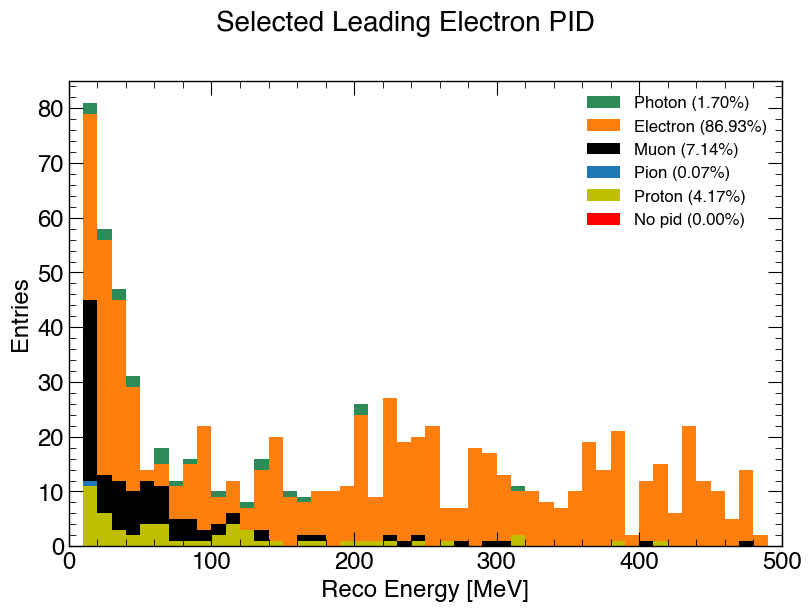

In [51]:
#weight_1 = 2.373
#weight_2 =14.1
#weight_1 = 1#.25
#weight_2 =1#.25
#Cosmics
selected_total = len(photon) + len(electron)+len(muon)+len(proton)+len(pion)+len(no_pid)


#No Cosmics
#selected_total = len(signal_1e1p)*weight_1 + len(signal_other_nue)*weight_1+len(signal_nc)*weight_2+len(signal_numu)*weight_2

plt.style.use('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/nue_ml_selection/plotting/plot_style.mplstyle')
bin_list,bin_centers,bin_weights =[],[],[]
bin_num = 50
bin_width = 500/bin_num
counts = [0]*bin_num
for i in range(bin_num):
    bin_list.append(i*bin_width)
    bin_centers.append((i)*bin_width+(bin_width/2))
    for e in data_1e1p:

        if (float(e) >= i*bin_width and float(e)<(i+1)*bin_width):
            counts[i] +=1
figure ,ax= plt.subplots(1,1,figsize=(8,6),constrained_layout=True)#gridspec_kw={'height_ratios': [5, 1]}

#Cosmics
ax.hist([no_pid,proton,pion,muon,electron,photon] ,color = ['r','y','#1f77b4','k','#ff7f0e','seagreen'],
        bins=bin_list,stacked = True,
        label = [f'No pid ({len(no_pid)/selected_total*100:.2f}%)',f'Proton ({len(proton)/selected_total*100:.2f}%)',
                 f'Pion ({len(pion)/selected_total*100:.2f}%)', f'Muon ({len(muon)/selected_total*100:.2f}%)',
                 f'Electron ({len(electron)/selected_total*100:.2f}%)',f'Photon ({len(photon)/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)
#No cosmics
#ax.hist([signal_numu,signal_nc,signal_other_nue,signal_1e1p,] ,weights = [[weight_2]*len(signal_numu),[weight_2]*len(signal_nc),[weight_1]*len(signal_other_nue),[weight_1]*len(signal_1e1p),],stacked = True,bins=bin_list,color = ['#1f77b4','k','#ff7f0e','seagreen'],
#        label = [f'$\u03BD_\u03BC$ ({int(len(signal_numu)*weight_2)}, {len(signal_numu)*weight_2/selected_total*100:.2f}%)',f'NC ({int(len(signal_nc)*weight_2)}, {len(signal_nc)*weight_2/selected_total*100:.2f}%)', f'Other $\u03BD_e$ ({int(len(signal_other_nue)*weight_1)}, {len(signal_other_nue)*weight_1/selected_total*100:.2f}%)',f'1e1p ({int(len(signal_1e1p)*weight_1)},{len(signal_1e1p)*weight_1/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)

#err_y = np.sqrt(counts)
#print(counts)
#ax.errorbar(bin_centers,counts,yerr=err_y,xerr=bin_width/2,fmt='o',color='black' ,label = f'data ({int(len(data_1e1p))})')
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [5,4,3, 2, 1, 0] 
  
# pass handle & labels lists along with order as below 
ax.legend([handles[i] for i in order], [labels[i] for i in order])

ax.set_xlim([0,500])
figure.suptitle('Selected Leading Electron PID')
ax.set_title(' ',fontdict ={'fontsize': 3})
ax.set_xlabel('Reco Energy [MeV]')
ax.set_ylabel('Entries')

plt.savefig('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/plots/1e1p_energy.png')

In [42]:
#print(len(df_selected['all_1e1p_cut']))
selected = 0
photon, electron, muon, pion,proton,no_pid = [],[],[],[],[],[]
data_1e1p,data_1eNp,data_1eX = [],[],[]
#for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
#    selected+=int(i[0])
#    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_data['all_1e1p_cut']):
    if int(i[0]) == 1:
        #if int(i[0]) == 0:
        data_1e1p.append(float(df_data['leading_electron_ke_reco'][index]))
print("Number of data 1e1p: ",len(data_1e1p))
for index,i in enumerate(df_data['all_1eNp_cut']):
    if int(i[0]) == 1:
        data_1eNp.append(float(df_data['leading_electron_ke_reco'][index]))
        #print(int(df_data['all_1e1p_cut'][index]))
            
print("Number of data 1eNp: ",len(data_1eNp))

for index,i in enumerate(df_selected_nu['leading_electron_pid_true']):
    print(i)
    if df_selected_nu['all_1e1p_cut'][index] == '1':
        if int(i[0]) == 0:
            photon.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 1:
            electron.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 2:
            muon.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 3:
            pion.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 4:
            proton.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i) == -1:
            no_pid.append(float(df_selected_nu['leading_electron_ke_true'][index]))

print(selected,"Number of MC 1e1p:",len(signal_1e1p))
print(len(signal_cosmic))
selected_total = 0
signal = []
for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
    selected_total+=int(i[0])
    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_selected_nu['Category_topology']):
    if int(i[0]) == 0 or int(i[0]) == 0:
        signal.append(float(df_selected_nu['visible_energy_reco'][index]))
        #print(df_selected['Category'][index])
print(selected_total,len(signal_1e1p))
#print(signal_other_nue)

Number of data 1e1p:  358
Number of data 1eNp:  458
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


NameError: name 'signal_1e1p' is not defined

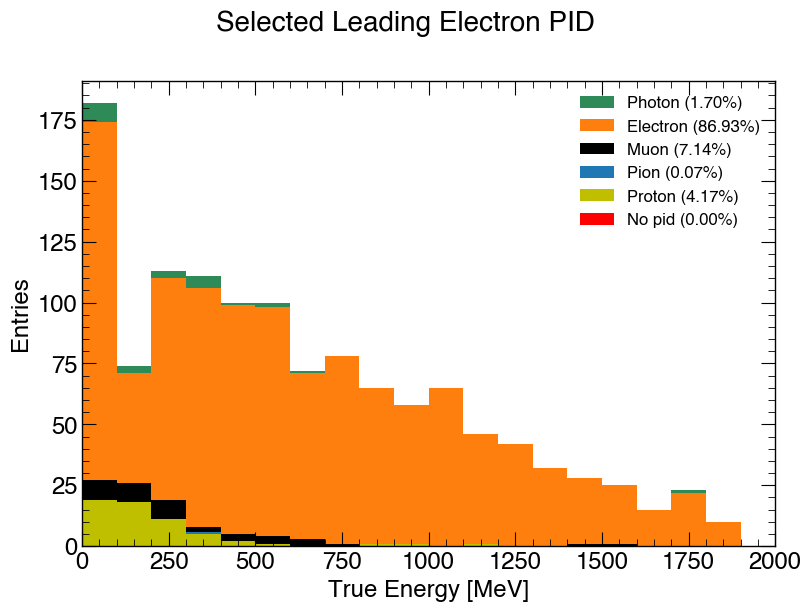

In [43]:
#weight_1 = 2.373
#weight_2 =14.1
#weight_1 = 1#.25
#weight_2 =1#.25
#Cosmics
selected_total = len(photon) + len(electron)+len(muon)+len(proton)+len(pion)+len(no_pid)


#No Cosmics
#selected_total = len(signal_1e1p)*weight_1 + len(signal_other_nue)*weight_1+len(signal_nc)*weight_2+len(signal_numu)*weight_2

plt.style.use('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/nue_ml_selection/plotting/plot_style.mplstyle')
bin_list,bin_centers,bin_weights =[],[],[]
bin_num = 20
bin_width = 2000/bin_num
counts = [0]*bin_num
for i in range(bin_num):
    bin_list.append(i*bin_width)
    bin_centers.append((i)*bin_width+(bin_width/2))
    for e in data_1e1p:

        if (float(e) >= i*bin_width and float(e)<(i+1)*bin_width):
            counts[i] +=1
figure ,ax= plt.subplots(1,1,figsize=(8,6),constrained_layout=True)#gridspec_kw={'height_ratios': [5, 1]}

#Cosmics
ax.hist([no_pid,proton,pion,muon,electron,photon] ,color = ['r','y','#1f77b4','k','#ff7f0e','seagreen'],
        bins=bin_list,stacked = True,
        label = [f'No pid ({len(no_pid)/selected_total*100:.2f}%)',f'Proton ({len(proton)/selected_total*100:.2f}%)',
                 f'Pion ({len(pion)/selected_total*100:.2f}%)', f'Muon ({len(muon)/selected_total*100:.2f}%)',
                 f'Electron ({len(electron)/selected_total*100:.2f}%)',f'Photon ({len(photon)/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)
#No cosmics
#ax.hist([signal_numu,signal_nc,signal_other_nue,signal_1e1p,] ,weights = [[weight_2]*len(signal_numu),[weight_2]*len(signal_nc),[weight_1]*len(signal_other_nue),[weight_1]*len(signal_1e1p),],stacked = True,bins=bin_list,color = ['#1f77b4','k','#ff7f0e','seagreen'],
#        label = [f'$\u03BD_\u03BC$ ({int(len(signal_numu)*weight_2)}, {len(signal_numu)*weight_2/selected_total*100:.2f}%)',f'NC ({int(len(signal_nc)*weight_2)}, {len(signal_nc)*weight_2/selected_total*100:.2f}%)', f'Other $\u03BD_e$ ({int(len(signal_other_nue)*weight_1)}, {len(signal_other_nue)*weight_1/selected_total*100:.2f}%)',f'1e1p ({int(len(signal_1e1p)*weight_1)},{len(signal_1e1p)*weight_1/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)

#err_y = np.sqrt(counts)
#print(counts)
#ax.errorbar(bin_centers,counts,yerr=err_y,xerr=bin_width/2,fmt='o',color='black' ,label = f'data ({int(len(data_1e1p))})')
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [5,4,3, 2, 1, 0] 
  
# pass handle & labels lists along with order as below 
ax.legend([handles[i] for i in order], [labels[i] for i in order])

ax.set_xlim([0,2000])
figure.suptitle('Selected Leading Electron PID')
ax.set_title(' ',fontdict ={'fontsize': 3})
ax.set_xlabel('True Energy [MeV]')
ax.set_ylabel('Entries')

plt.savefig('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/plots/1e1p_energy.png')

In [44]:
#print(len(df_selected['all_1e1p_cut']))
selected = 0
photon, electron, muon, pion,proton,no_pid = [],[],[],[],[],[]
data_1e1p,data_1eNp,data_1eX = [],[],[]
#for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
#    selected+=int(i[0])
#    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_data['all_1e1p_cut']):
    if int(i[0]) == 1:
        #if int(i[0]) == 0:
        data_1e1p.append(float(df_data['leading_electron_ke_reco'][index]))
print("Number of data 1e1p: ",len(data_1e1p))
for index,i in enumerate(df_data['all_1eNp_cut']):
    if int(i[0]) == 1:
        data_1eNp.append(float(df_data['leading_electron_ke_reco'][index]))
        #print(int(df_data['all_1e1p_cut'][index]))
            
print("Number of data 1eNp: ",len(data_1eNp))

for index,i in enumerate(df_selected_nu['leading_proton_pid_true']):
    print(i)
    if df_selected_nu['all_1e1p_cut'][index] == '1':
        if int(i[0]) == 0:
            photon.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 1:
            electron.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 2:
            muon.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 3:
            pion.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i[0]) == 4:
            proton.append(float(df_selected_nu['leading_electron_ke_reco'][index]))
        elif int(i) == -1:
            no_pid.append(float(df_selected_nu['leading_electron_ke_reco'][index]))

print(selected,"Number of MC 1e1p:",len(signal_1e1p))
print(len(signal_cosmic))
selected_total = 0
signal = []
for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
    selected_total+=int(i[0])
    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_selected_nu['Category_topology']):
    if int(i[0]) == 0 or int(i[0]) == 0:
        signal.append(float(df_selected_nu['visible_energy_reco'][index]))
        #print(df_selected['Category'][index])
print(selected_total,len(signal_1e1p))
#print(signal_other_nue)

Number of data 1e1p:  358
Number of data 1eNp:  458
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
1
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
1
1
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
1
1
1
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
1
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


NameError: name 'signal_1e1p' is not defined

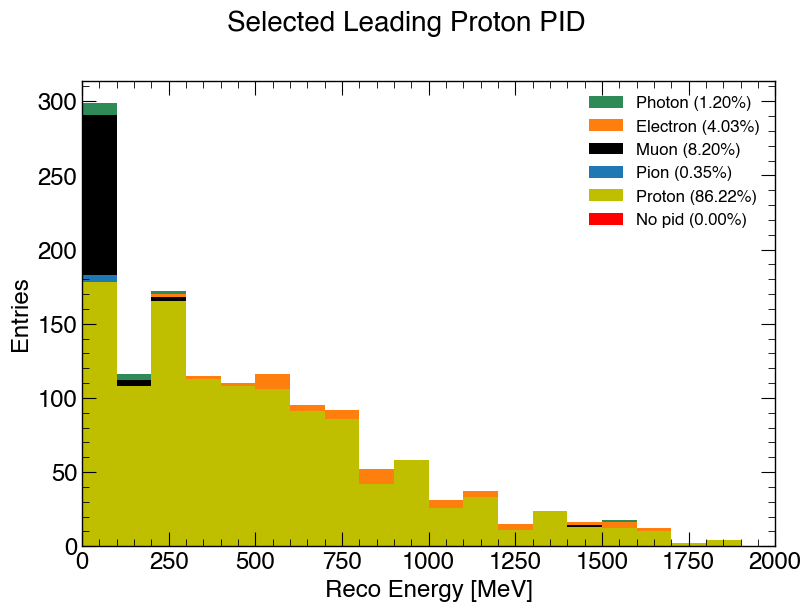

In [45]:
#weight_1 = 2.373
#weight_2 =14.1
#weight_1 = 1#.25
#weight_2 =1#.25
#Cosmics
selected_total = len(photon) + len(electron)+len(muon)+len(proton)+len(pion)+len(no_pid)


#No Cosmics
#selected_total = len(signal_1e1p)*weight_1 + len(signal_other_nue)*weight_1+len(signal_nc)*weight_2+len(signal_numu)*weight_2

plt.style.use('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/nue_ml_selection/plotting/plot_style.mplstyle')
bin_list,bin_centers,bin_weights =[],[],[]
bin_num = 20
bin_width = 2000/bin_num
counts = [0]*bin_num
for i in range(bin_num):
    bin_list.append(i*bin_width)
    bin_centers.append((i)*bin_width+(bin_width/2))
    for e in data_1e1p:

        if (float(e) >= i*bin_width and float(e)<(i+1)*bin_width):
            counts[i] +=1
figure ,ax= plt.subplots(1,1,figsize=(8,6),constrained_layout=True)#gridspec_kw={'height_ratios': [5, 1]}

#Cosmics
ax.hist([no_pid,proton,pion,muon,electron,photon] ,color = ['r','y','#1f77b4','k','#ff7f0e','seagreen'],
        bins=bin_list,stacked = True,
        label = [f'No pid ({len(no_pid)/selected_total*100:.2f}%)',f'Proton ({len(proton)/selected_total*100:.2f}%)',
                 f'Pion ({len(pion)/selected_total*100:.2f}%)', f'Muon ({len(muon)/selected_total*100:.2f}%)',
                 f'Electron ({len(electron)/selected_total*100:.2f}%)',f'Photon ({len(photon)/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)
#No cosmics
#ax.hist([signal_numu,signal_nc,signal_other_nue,signal_1e1p,] ,weights = [[weight_2]*len(signal_numu),[weight_2]*len(signal_nc),[weight_1]*len(signal_other_nue),[weight_1]*len(signal_1e1p),],stacked = True,bins=bin_list,color = ['#1f77b4','k','#ff7f0e','seagreen'],
#        label = [f'$\u03BD_\u03BC$ ({int(len(signal_numu)*weight_2)}, {len(signal_numu)*weight_2/selected_total*100:.2f}%)',f'NC ({int(len(signal_nc)*weight_2)}, {len(signal_nc)*weight_2/selected_total*100:.2f}%)', f'Other $\u03BD_e$ ({int(len(signal_other_nue)*weight_1)}, {len(signal_other_nue)*weight_1/selected_total*100:.2f}%)',f'1e1p ({int(len(signal_1e1p)*weight_1)},{len(signal_1e1p)*weight_1/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)

#err_y = np.sqrt(counts)
#print(counts)
#ax.errorbar(bin_centers,counts,yerr=err_y,xerr=bin_width/2,fmt='o',color='black' ,label = f'data ({int(len(data_1e1p))})')
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [5,4,3, 2, 1, 0] 
  
# pass handle & labels lists along with order as below 
ax.legend([handles[i] for i in order], [labels[i] for i in order])

ax.set_xlim([0,2000])
figure.suptitle('Selected Leading Proton PID')
ax.set_title(' ',fontdict ={'fontsize': 3})
ax.set_xlabel('Reco Energy [MeV]')
ax.set_ylabel('Entries')

plt.savefig('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/plots/1e1p_energy.png')

In [46]:
#print(len(df_selected['all_1e1p_cut']))
selected = 0
photon, electron, muon, pion,proton,no_pid = [],[],[],[],[],[]
data_1e1p,data_1eNp,data_1eX = [],[],[]
#for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
#    selected+=int(i[0])
#    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_data['all_1e1p_cut']):
    if int(i[0]) == 1:
        #if int(i[0]) == 0:
        data_1e1p.append(float(df_data['leading_electron_ke_reco'][index]))
print("Number of data 1e1p: ",len(data_1e1p))
for index,i in enumerate(df_data['all_1eNp_cut']):
    if int(i[0]) == 1:
        data_1eNp.append(float(df_data['leading_electron_ke_reco'][index]))
        #print(int(df_data['all_1e1p_cut'][index]))
            
print("Number of data 1eNp: ",len(data_1eNp))

for index,i in enumerate(df_selected_nu['leading_proton_pid_true']):
    print(i)
    if df_selected_nu['all_1e1p_cut'][index] == '1':
        if int(i[0]) == 0:
            photon.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 1:
            electron.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 2:
            muon.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 3:
            pion.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i[0]) == 4:
            proton.append(float(df_selected_nu['leading_electron_ke_true'][index]))
        elif int(i) == -1:
            no_pid.append(float(df_selected_nu['leading_electron_ke_true'][index]))

print(selected,"Number of MC 1e1p:",len(signal_1e1p))
print(len(signal_cosmic))
selected_total = 0
signal = []
for index,i in enumerate(df_selected_nu['all_1e1p_cut']):
    selected_total+=int(i[0])
    #if int(i) == 1:
        #print(df_signal['all_1e1p_cut'][index])
for index,i in enumerate(df_selected_nu['Category_topology']):
    if int(i[0]) == 0 or int(i[0]) == 0:
        signal.append(float(df_selected_nu['visible_energy_reco'][index]))
        #print(df_selected['Category'][index])
print(selected_total,len(signal_1e1p))
#print(signal_other_nue)

Number of data 1e1p:  358
Number of data 1eNp:  458
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
1
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
1
1
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
1
1
1
4
4
4
4
4
4
4
4
4
4
4
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
4
1
4
4
4
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


NameError: name 'signal_1e1p' is not defined

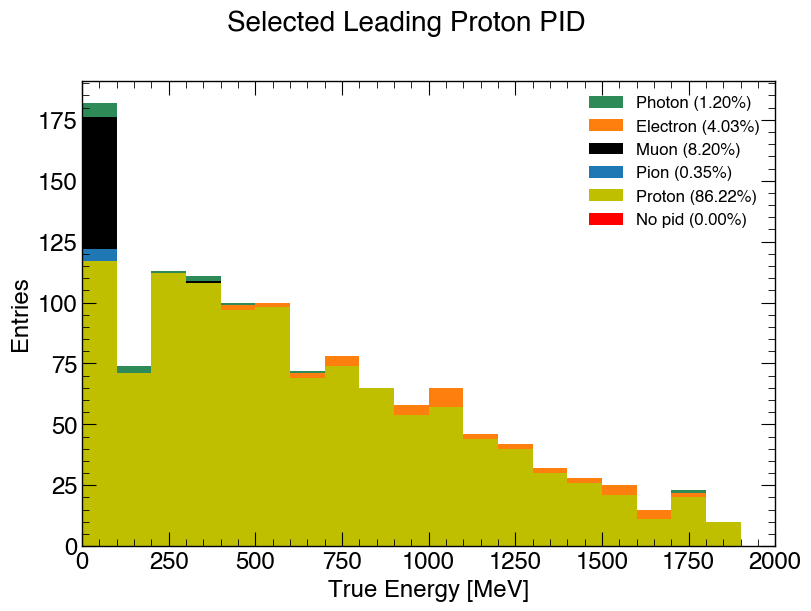

In [47]:
#weight_1 = 2.373
#weight_2 =14.1
#weight_1 = 1#.25
#weight_2 =1#.25
#Cosmics
selected_total = len(photon) + len(electron)+len(muon)+len(proton)+len(pion)+len(no_pid)


#No Cosmics
#selected_total = len(signal_1e1p)*weight_1 + len(signal_other_nue)*weight_1+len(signal_nc)*weight_2+len(signal_numu)*weight_2

plt.style.use('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/nue_ml_selection/plotting/plot_style.mplstyle')
bin_list,bin_centers,bin_weights =[],[],[]
bin_num = 20
bin_width = 2000/bin_num
counts = [0]*bin_num
for i in range(bin_num):
    bin_list.append(i*bin_width)
    bin_centers.append((i)*bin_width+(bin_width/2))
    for e in data_1e1p:

        if (float(e) >= i*bin_width and float(e)<(i+1)*bin_width):
            counts[i] +=1
figure ,ax= plt.subplots(1,1,figsize=(8,6),constrained_layout=True)#gridspec_kw={'height_ratios': [5, 1]}

#Cosmics
ax.hist([no_pid,proton,pion,muon,electron,photon] ,color = ['r','y','#1f77b4','k','#ff7f0e','seagreen'],
        bins=bin_list,stacked = True,
        label = [f'No pid ({len(no_pid)/selected_total*100:.2f}%)',f'Proton ({len(proton)/selected_total*100:.2f}%)',
                 f'Pion ({len(pion)/selected_total*100:.2f}%)', f'Muon ({len(muon)/selected_total*100:.2f}%)',
                 f'Electron ({len(electron)/selected_total*100:.2f}%)',f'Photon ({len(photon)/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)
#No cosmics
#ax.hist([signal_numu,signal_nc,signal_other_nue,signal_1e1p,] ,weights = [[weight_2]*len(signal_numu),[weight_2]*len(signal_nc),[weight_1]*len(signal_other_nue),[weight_1]*len(signal_1e1p),],stacked = True,bins=bin_list,color = ['#1f77b4','k','#ff7f0e','seagreen'],
#        label = [f'$\u03BD_\u03BC$ ({int(len(signal_numu)*weight_2)}, {len(signal_numu)*weight_2/selected_total*100:.2f}%)',f'NC ({int(len(signal_nc)*weight_2)}, {len(signal_nc)*weight_2/selected_total*100:.2f}%)', f'Other $\u03BD_e$ ({int(len(signal_other_nue)*weight_1)}, {len(signal_other_nue)*weight_1/selected_total*100:.2f}%)',f'1e1p ({int(len(signal_1e1p)*weight_1)},{len(signal_1e1p)*weight_1/selected_total*100:.2f}%)'])#,weights= [weight_1]*len(signal_1e1p)

#err_y = np.sqrt(counts)
#print(counts)
#ax.errorbar(bin_centers,counts,yerr=err_y,xerr=bin_width/2,fmt='o',color='black' ,label = f'data ({int(len(data_1e1p))})')
handles, labels = plt.gca().get_legend_handles_labels() 
  
# specify order 
order = [5,4,3, 2, 1, 0] 
  
# pass handle & labels lists along with order as below 
ax.legend([handles[i] for i in order], [labels[i] for i in order])

ax.set_xlim([0,2000])
figure.suptitle('Selected Leading Proton PID')
ax.set_title(' ',fontdict ={'fontsize': 3})
ax.set_xlabel('True Energy [MeV]')
ax.set_ylabel('Entries')

plt.savefig('/Users/danielcarber/Documents/ICARUS/NuMI_Nue/1e1p/plots/1e1p_energy.png')